In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read in cleaned data, and clean again
data = pd.read_csv("data/sub_dataset.csv")
del data["country-year"]
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Sweden,1990,male,75+ years,144,261500,55.07,0.815,"258,154,283,909",32246,G.I. Generation
1,Sweden,1990,male,55-74 years,287,798100,35.96,0.815,"258,154,283,909",32246,G.I. Generation
2,Sweden,1990,male,35-54 years,340,1174000,28.96,0.815,"258,154,283,909",32246,Silent
3,Sweden,1990,male,25-34 years,157,606600,25.88,0.815,"258,154,283,909",32246,Boomers
4,Sweden,1990,female,55-74 years,138,883800,15.61,0.815,"258,154,283,909",32246,G.I. Generation


In [3]:
data["age"].value_counts()

55-74 years    1900
5-14 years     1900
15-24 years    1900
75+ years      1900
35-54 years    1900
25-34 years    1900
Name: age, dtype: int64

In [4]:
data["sex"].value_counts()

female    5700
male      5700
Name: sex, dtype: int64

In [5]:
# Grouping

sub_data = data.loc[:,["country","year","sex","age","suicides_no"]]
#group_data = sub_data.groupby(["country","age","sex"])
group_data = sub_data.groupby(["age","sex"])

suicide_sum = pd.DataFrame(group_data["suicides_no"].sum())

In [6]:
# DataFrame Overview

suicide_sum.rename(columns = {"suicides_no":"suicides_sum"})
suicide_sum.sort_values("age")
suicide_sum.head()

suicides_no
age         sex                
15-24 years female       113466
            male         435073
25-34 years female       143549
            male         631340
35-54 years female       355754

In [7]:
# Unstack the DataFrame to create bar chart
suicide_sum = suicide_sum.unstack()
suicide_sum

suicides_no         
sex              female     male
age                             
15-24 years      113466   435073
25-34 years      143549   631340
35-54 years      355754  1368261
5-14 years        11519    24501
55-74 years      297580   859581
75+ years        160053   306630

In [8]:
# Create an index column to sort age group
ind = [2, 3, 4, 1, 5, 6]
suicide_sum["index_col"] = ind
suicide_sum = suicide_sum.sort_values("index_col")['suicides_no']
suicide_sum

sex,female,male
age,,
5-14 years,11519,24501
15-24 years,113466,435073
25-34 years,143549,631340
35-54 years,355754,1368261
55-74 years,297580,859581
75+ years,160053,306630


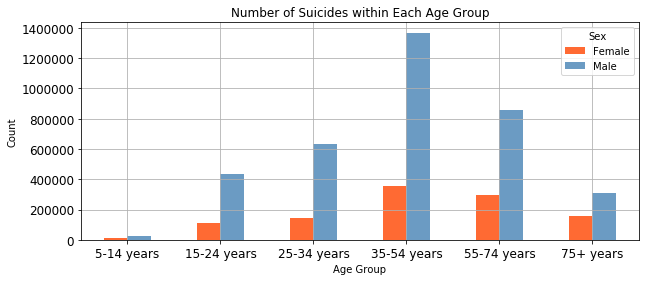

In [9]:
suicide_sum.plot(kind="bar", rot = 0, figsize = (10,4), 
                 color = ["orangered","steelblue"], fontsize = 12, alpha = 0.8)

plt.legend(["Female","Male"],title="Sex")
plt.title("Number of Suicides within Each Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")

plt.grid()
plt.show()

In [10]:
# Another graph showing sum of suicide counts for female and male  
sex_group = sub_data.groupby(["sex"])
sum_by_sex = pd.DataFrame(sex_group["suicides_no"].sum())
sum_by_sex

,suicides_no
sex,
female,1081921
male,3625386


<Figure size 432x288 with 0 Axes>

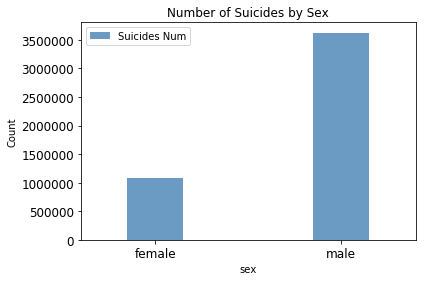

In [11]:
plt.figure()

sum_by_sex.plot(kind = "bar", color = "steelblue", width = 0.3, alpha = 0.8, rot = 0, fontsize = 12)
plt.title("Number of Suicides by Sex")
plt.ylabel("Count")
plt.legend(["Suicides Num"],loc="best")
plt.show()

In [12]:
# Do a two sample T-Test on female and male data
import scipy.stats as stats
df3 = sub_data.groupby(["sex","year"])
df3_sum = pd.DataFrame(df3["suicides_no"].sum())
df3_sum

suicides_no
sex    year             
female 1990        42653
       1991        41421
       1992        41852
       1993        42594
       1994        42334
       1995        43262
       1996        42297
       1997        42482
       1998        43612
       1999        43268
       2000        42380
       2001        42267
       2002        43720
       2003        44081
       2004        44092
       2005        43716
       2006        42745
       2007        44233
       2008        44593
       2009        44933
       2010        44313
       2011        44853
       2012        43682
       2013        43450
       2014        43088
male   1990       119185
       1991       120889
       1992       128949
       1993       140470
       1994       147425
       1995       148351
       1996       146367
       1997       145085
       1998       150881
       1999       151438
       2000       152891
       2001       155110
       2002       155517
       2003       156172
       2004       152968
       2005       150230
       2006       146108
       2007       145291
       2008       146073
       2009       149715
       2010       146123
       2011       145373
       2012       142390
       2013       142613
       2014       139772

In [13]:
df_female = sub_data.loc[sub_data["sex"] == "female", :]
df_male = sub_data.loc[sub_data["sex"] == "male", :]

stats.ttest_ind(df_female["suicides_no"], df_male["suicides_no"], equal_var=False)

Ttest_indResult(statistic=-18.76678543083263, pvalue=1.457542644160781e-76)